In [1]:
import music21

In [2]:
import copy
import numpy as np

In [3]:
f = music21.note.Note("A-5")

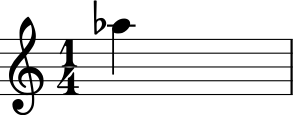

In [4]:
f.show()

In [5]:
f.octave

5

In [6]:
cMinor = music21.chord.Chord(["C4","G4","E-5"])

In [7]:
cMinor2 = music21.chord.Chord(["C0","G1","E7"])

In [8]:
cMinor.offset = 10.

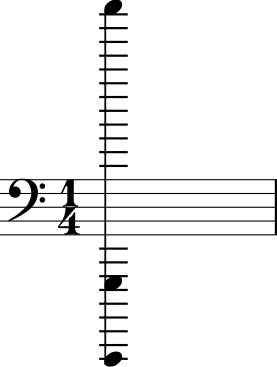

In [9]:
cMinor2.show()

In [10]:
stream1 = music21.stream.Stream()

In [11]:
stream1.append( cMinor )

In [12]:
stream1.append( cMinor2 )

In [13]:
stream1.show( 'midi' )

In [14]:
for i in range( 5 ):
    
    chord = copy.deepcopy( cMinor )
    chord.duration.quarterLength = 1. + float( i )*.25
    
    stream1.append( chord )

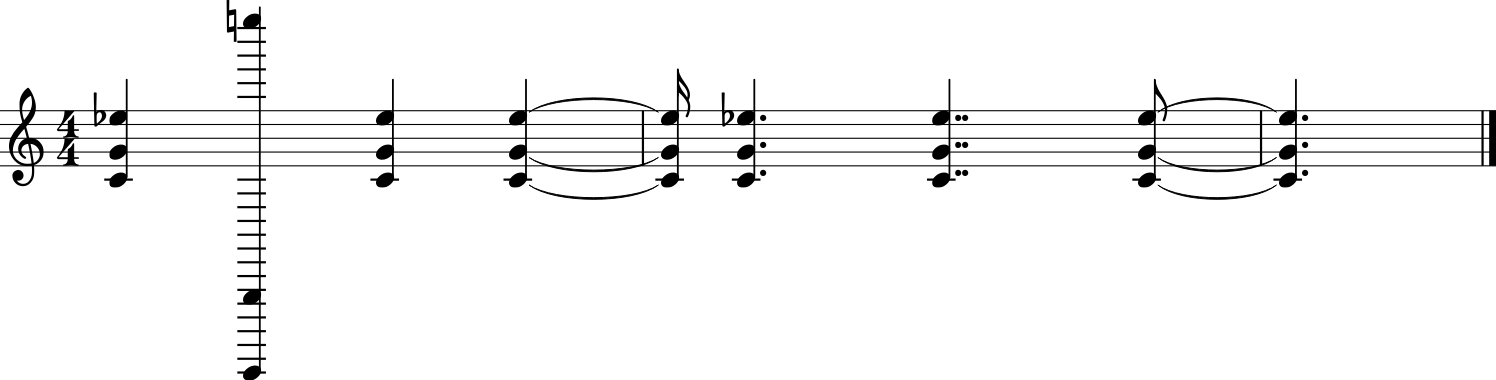

In [15]:
stream1.show()

In [16]:
chord.duration.quarterLength = 1.5

# Load the Data

In [17]:
data = np.load( 'm12i_SFH.npz' )

In [18]:
data.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x10df192b0>)

In [19]:
data['sfrs'].size

1381

In [20]:
data['time_edges'].size

1382

# Tinker

In [21]:
def amplified_note( amp_number, note='A-' ):
    
    chord = [ '{}{}'.format( note, i ) for i in range( amp_number) ]
    
    return music21.chord.Chord( chord )
    
    

In [22]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [23]:
def map_to_amplified_note( value, value_min, value_max ):
    
    amp_number_float = translate( value, value_min, value_max, 1., 10., )
    
    amp_number = np.floor( amp_number_float ).astype( int )
    
    return amplified_note( amp_number )

# Save Data to Stream

In [25]:
sfr_min = 0.01
sfr_max = 10

In [26]:
map_to_amplified_note( data['sfrs'][15], sfr_min, sfr_max )

<music21.chord.Chord >

In [27]:
sfr_min = data['sfrs'].min()
sfr_max = data['sfrs'].max()

In [28]:
sfr_stream = music21.stream.Stream()

In [29]:
for i, sfr in enumerate( data['sfrs'] ):
    
    note = map_to_amplified_note( sfr, sfr_min, sfr_max )
    
    sfr_stream.append( note )

In [30]:
fp = sfr_stream.write('midi', fp='./sfr_midi.mid')

In [32]:
stream1.show( 'midi' )

In [33]:
mf.file

NameError: name 'mf' is not defined